CPSC 483 PROJECT #1<br>
BRENDON LINTHURST<br>
4/9/2020

**EXPERIMENTS:**

# QUESTION #1: <br>Load the data and create a scatterplot. Does the relationship appear to be linear?

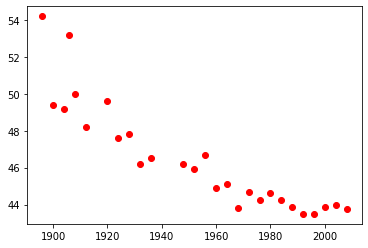

In [0]:
import numpy as np
import csv
import matplotlib.pyplot as plt

data = np.loadtxt('male400.csv', delimiter= ',', skiprows=1)

x = data[:,0][:,None]
t = data[:,1][:,None]

plt.plot(x, t, 'ro')

**ANSWER #1:** The relationship does not appear linear. It appears to flatten and increase somewhere around 1995-2008 indicating that this is likely not a linear relationship.

# QUESTION #2:<br>Use linear regression to fit a line to the data. Add the line to the scatterplot. Compute the MSE for this linear model.

We calculate the loss by first finding W1 and W0 

![w1](https://render.githubusercontent.com/render/math?math=w_1%20%3D%20%5Cfrac%7B%5Cbar%7Bx%7D%5Cbar%7Bt%7D%20-%20%5Cbar%7Bxt%7D%7D%7B%5Cbar%7Bx%7D%5Cbar%7Bx%7D%20-%20%5Cbar%7Bx%5E2%7D%7D&mode=display)

![w0](https://render.githubusercontent.com/render/math?math=w_0%20%3D%20%5Cbar%7Bt%7D%20-%20w_1%5Cbar%7Bx%7D&mode=display)

MSE: 1.5780331724469312 


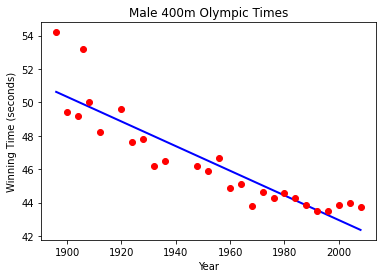

In [0]:
# Find averages
xbar = x.mean()
tbar = t.mean()
xxbar = np.multiply(x, x).mean()
xtbar = np.multiply(x, t).mean()

# Compute W0 and W1

w1 = (tbar * xbar - xtbar) / (xbar * xbar - xxbar)
w0 = tbar-w1*xbar

# Plot the best fit line

x_test = np.linspace(1896,2008,100)[:,None]
f_test = w0 + w1 * x_test
plt.plot(x_test, f_test, 'b-', linewidth=2)
plt.plot(x, t, 'ro')
plt.xlabel('Year')
plt.ylabel('Winning Time (seconds)')
plt.title('Male 400m Olympic Times')

# Compute MSE

loss = []
for year, value in zip(x, t):
    loss.append(((w0 + w1 * year) - value) ** 2)
    
mse = np.array(loss).mean()
print("MSE: %s " % str(mse))


**ANSWER #2: The average squared loss for this model is ~1.578**

# QUESTION #3:<br> Fit a 3rd order polynomial to the data. Compare the average squared loss for this model with the loss of the linear model.

0.9738943979990324


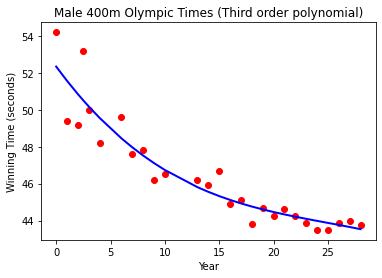

In [0]:
# Rescale x to help with looking at higher orders
x = (x-1896)/4

# Calculate third order X, w, f_test
maxorder = 3
X = np.ones_like(x)

for i in range(1, maxorder + 1):
  X = np.hstack((X, x ** i))

w = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,t))
f_test3 = np.dot(X, w)

# Plot the result
plt.plot(x, t, 'ro')
plt.plot(x, f_test3, 'b-', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Winning Time (seconds)')
plt.title('Male 400m Olympic Times (Third order polynomial)')

# Compute average squared loss

# Below line adapted from https://stackoverflow.com/questions/16774849/mean-squared-error-in-numpy
mse3 = np.square(np.subtract(np.dot(X, w), t)).mean()
print(mse3)


**ANSWER #3**

The MSE for third order is **~0.973** <br>
The MSE for linear is ** ~1.578** <br>

The third order appears to be a better model because the error is lower.

# QUESTION #4:<br> Fit a 5th order polynomial to the data and compare the average squared loss with the previous two models.

0.9232230391967325


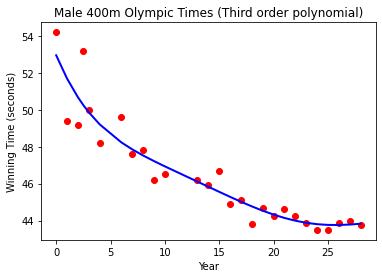

In [0]:
maxorder = 5
X = np.ones_like(x)
for i in range(1, maxorder + 1):
  X = np.hstack((X, x ** i))

w = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,t))
f_test5 = np.dot(X, w)

# Plot the result
plt.plot(x, t, 'ro')
plt.plot(x, f_test5, 'b-', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Winning Time (seconds)')
plt.title('Male 400m Olympic Times (Third order polynomial)')

# Compute the average squared loss for fifth order
mse5 = np.square(np.subtract(np.dot(X, w), t)).mean()
print(mse5)

**ANSWER #4**

The MSE for fifth order appears as **~0.923** <br>
This is the lowest average squared loss yet, indicating that this is the most accurate model so far.

# QUESTION #5: <br>

Plot 3rd and 5th order polynomials on a scatterplot, which appears to look like a better model?

Text(0.5, 1.0, 'Male 400m Olympic Times (BLUE = 3rd order YELLOW = 5th order)')

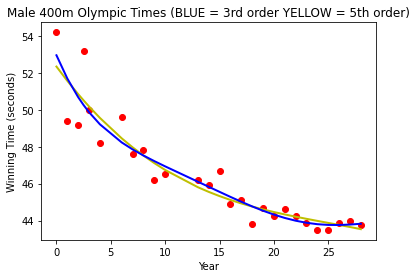

In [0]:
plt.plot(x, t, 'ro')
plt.plot(x, f_test3, 'y-', linewidth=2)
plt.plot(x, f_test5, 'b-', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Winning Time (seconds)')
plt.title('Male 400m Olympic Times (BLUE = 3rd order YELLOW = 5th order)')


**ANSWER #5**

Yellow line (5th order) appears to fit our data closer and is confirmed by the lower MSE however it is beginning to develop higher variance and approach overfitting.

# QUESTION #6:<br>Add L2 regularization to the code, then fit 5th order polynomials for each of lambda 0.01, 0.1, 1, 10, and 100. Plot each model on a scatterplot. Which value of lambda appears to fit the data best?

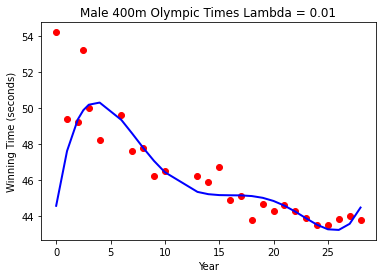

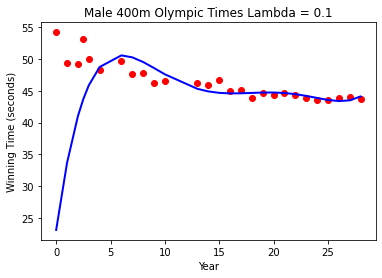

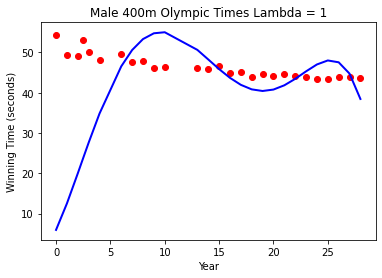

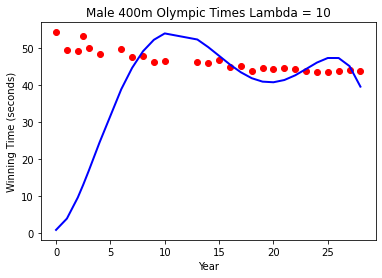

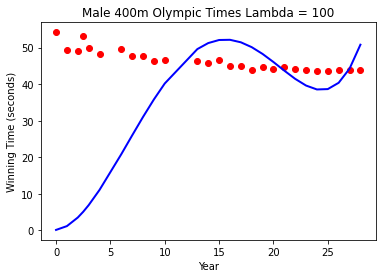

In [0]:
lambda_values = [0.01, 0.1, 1, 10, 100]

for value in lambda_values:
  w = np.linalg.solve(np.dot(X.T, X) + x.size*value*np.identity(maxorder + 1), np.dot(X.T, t))
  f_test = np.dot(X, w)
  plt.figure()
  plt.plot(x, t, 'ro')
  plt.plot(x, f_test, 'b-', linewidth=2)
  plt.xlabel('Year')
  plt.ylabel('Winning Time (seconds)')
  plt.title('Male 400m Olympic Times Lambda = ' + str(value))

**ANSWER #6**

Lambda = 0.1 appears to be the best model followed closely by Lambda = 0.01.

**WORKS CITED**

https://stackoverflow.com/questions/16774849/mean-squared-error-in-numpy
https://github.com/sdrogers/fcmlcode/tree/master/notebooks/chapter1